In [1]:
# Name: Muhammad Haseeb
# Roll No : SP21-BSE-027
# CSC461 – Assignment2 – IDS – Data Visualization
# Date : 28 March 2024

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
# Question No 1
data = pd.read_csv('./world_pop.csv')
data.head()


,country,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,...,30117411,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
1,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2905195,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0
2,Algeria,11057864.0,11336336.0,11619828.0,11912800.0,12221675.0,12550880.0,12902626.0,13275020.0,13663581.0,...,36661438,37383899.0,38140135.0,38923688.0,39728020.0,40551398.0,41389174.0,42228415.0,43053054.0,43851043.0
3,American Samoa,20127.0,20605.0,21246.0,22029.0,22850.0,23675.0,24473.0,25235.0,25980.0,...,55755,55669.0,55717.0,55791.0,55806.0,55739.0,55617.0,55461.0,55312.0,55197.0
4,Andorra,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,19646.0,20760.0,21886.0,...,83748,82427.0,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0


                country     year_2020
40                China  1.402112e+09
88                India  1.380004e+09
205       United States  3.294841e+08
89            Indonesia  2.735236e+08
148            Pakistan  2.208923e+08
26               Brazil  2.125594e+08
143             Nigeria  2.061396e+08
15           Bangladesh  1.646894e+08
160  Russian Federation  1.441041e+08
126              Mexico  1.289328e+08


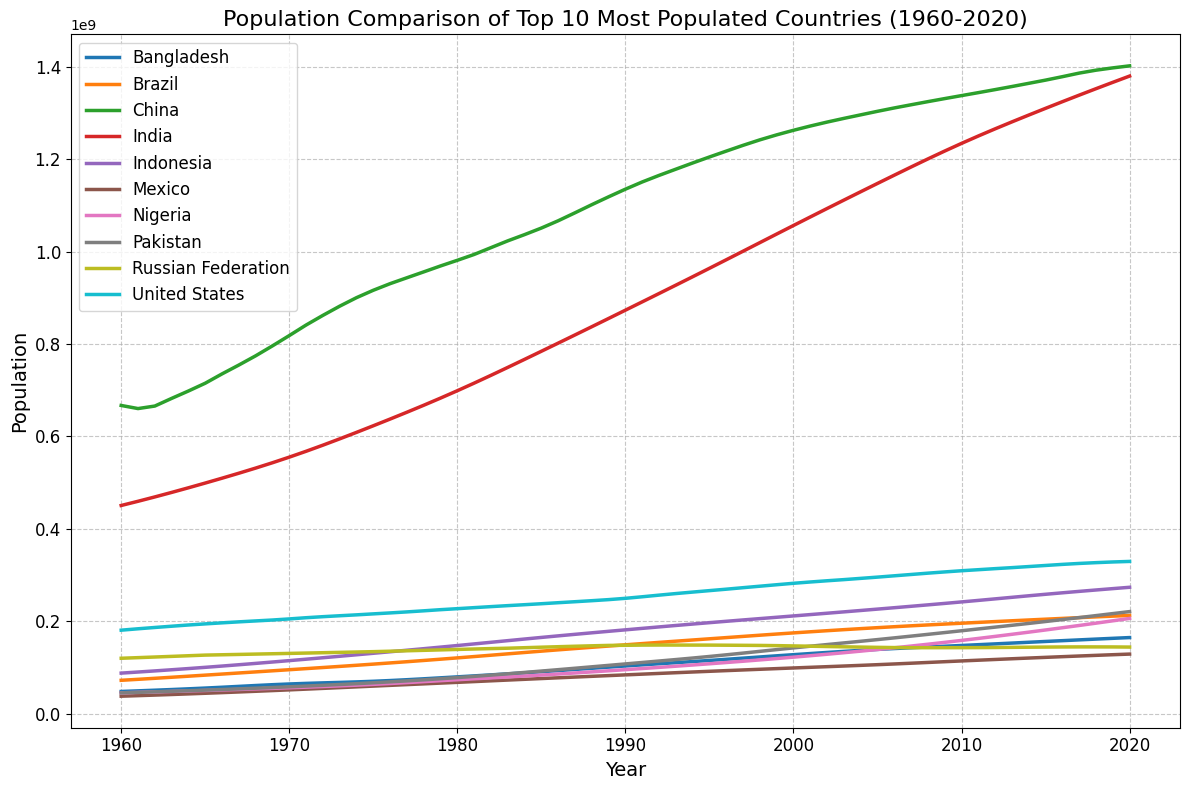

In [3]:
top_10_2020 = data[['country', 'year_2020']].sort_values(by='year_2020', ascending=False).head(10)
print(top_10_2020)

top_10_countries = top_10_2020['country'].tolist()

top_10_data = data[data['country'].isin(top_10_countries)]

melted_data = top_10_data.melt(id_vars=['country'], var_name='year', value_name='population')

melted_data['year'] = melted_data['year'].str.extract('(\d+)').astype(int)

plt.figure(figsize=(12, 8))
sns.lineplot(data=melted_data, x='year', y='population', hue='country', palette='tab10', linewidth=2.5)
plt.title('Population Comparison of Top 10 Most Populated Countries (1960-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



                      country  year_2015
136                     Nauru    10374.0
200                    Tuvalu    11099.0
149                     Palau    17665.0
27     British Virgin Islands    29148.0
163                San Marino    33270.0
74                  Gibraltar    33742.0
182  St. Martin (French part)    35865.0
199  Turks and Caicos Islands    35979.0
113             Liechtenstein    37465.0
129                    Monaco    37723.0


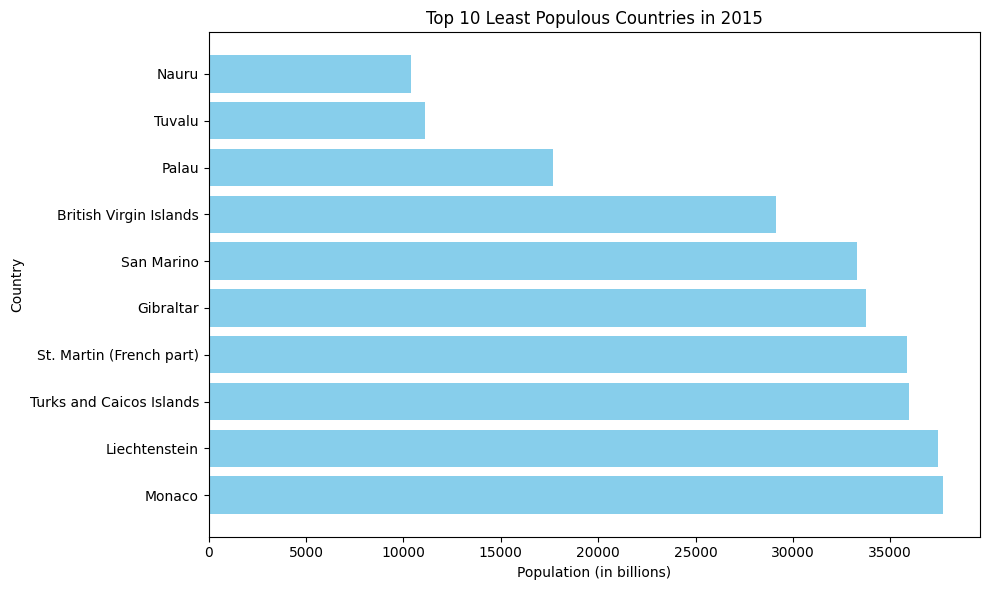

In [4]:
# Question No 2
# Show the population of 10 least populous countries in 2015 using a chart.
least_populous_2015 = data[['country', 'year_2015']].sort_values(by='year_2015').head(10)
print(least_populous_2015)
plt.figure(figsize=(10, 6))
plt.barh(least_populous_2015['country'], least_populous_2015['year_2015'], color='skyblue')
plt.xlabel('Population (in billions)')
plt.ylabel('Country')
plt.title('Top 10 Least Populous Countries in 2015')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

            country    year_1970   year_2010       Change
88            India  555189797.0  1234281163  679091366.0
148        Pakistan   58142062.0   179424643  121282581.0
204  United Kingdom   55663250.0    62766365    7103115.0
205   United States  205052000.0   309327143  104275143.0


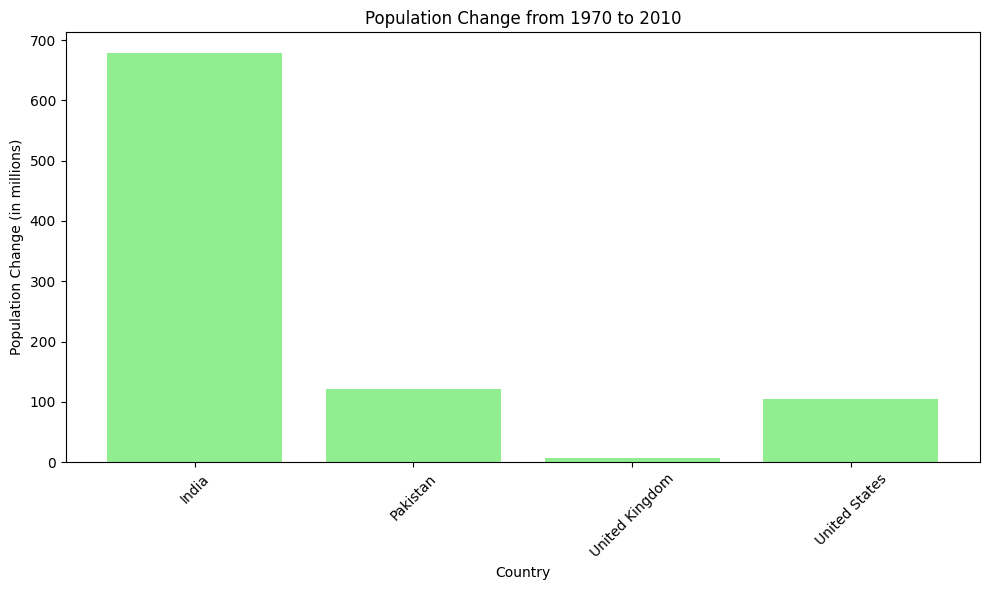

In [5]:
# Calculate the change in population of Pakistan, India, United States, and United Kingdom from 1970
# to 2010 and show the population change (in millions) using a chart.
countries = ['Pakistan', 'India', 'United States', 'United Kingdom']
population_change = data[data['country'].isin(countries)][['country', 'year_1970', 'year_2010']]
population_change['Change'] = population_change['year_2010'] - population_change['year_1970']
print(population_change )

plt.figure(figsize=(10, 6))
plt.bar(population_change['country'], population_change['Change'] / 1e6, color='lightgreen')
plt.xlabel('Country')
plt.ylabel('Population Change (in millions)')
plt.title('Population Change from 1970 to 2010')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

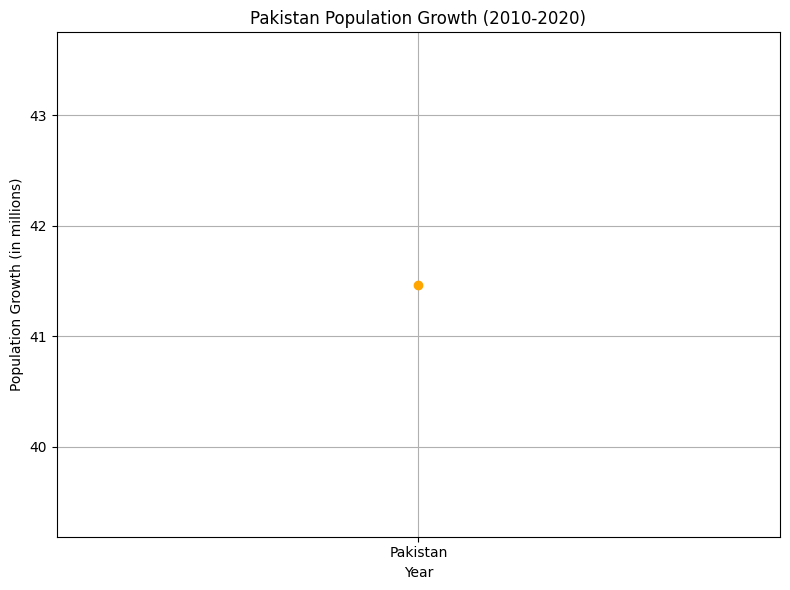

In [6]:
# Calculate the Pakistan population growth between 2010-2020 and then show the data using a chart.
pakistan_growth = data[data['country'] == 'Pakistan'][['country', 'year_2010', 'year_2020']]
pakistan_growth['Growth'] = pakistan_growth['year_2020'] - pakistan_growth['year_2010']

plt.figure(figsize=(8, 6))
plt.plot(pakistan_growth['country'], pakistan_growth['Growth'] / 1e6, marker='o', color='orange')
plt.xlabel('Year')
plt.ylabel('Population Growth (in millions)')
plt.title('Pakistan Population Growth (2010-2020)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Question No 3
df = pd.read_csv('./diamonds.csv')
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
14      0.20    Premium     E     SI2   60.2   62.0    345  3.79  3.75  2.27
91      0.86       Fair     E     SI2   55.1   69.0   2757  6.45  6.33  3.52
111     0.74      Ideal     E     SI2   62.2   56.0   2761  5.80  5.84  3.62
298     1.01       Fair     E     SI2   67.4   60.0   2797  6.19  6.05  4.13
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53785   0.89       Good     E     SI2   64.3   65.0   2728  6.00  5.95  3.84
53818   0.81  Very Good     E     SI2   63.7   57.0   2735  5.86  5.94  3.76
53902   0.77  Very Good     E     SI2   59.9   61.0   2753  5.98  6.01  3.59
53915   0.77      Ideal     E     SI2   62.1   56.0   2753  5.84  5.86  3.63
53928   0.79    Premium     E     SI2   61.4   58.0   2756  6.03  5.96  3.68

[1713 rows x 10 columns]


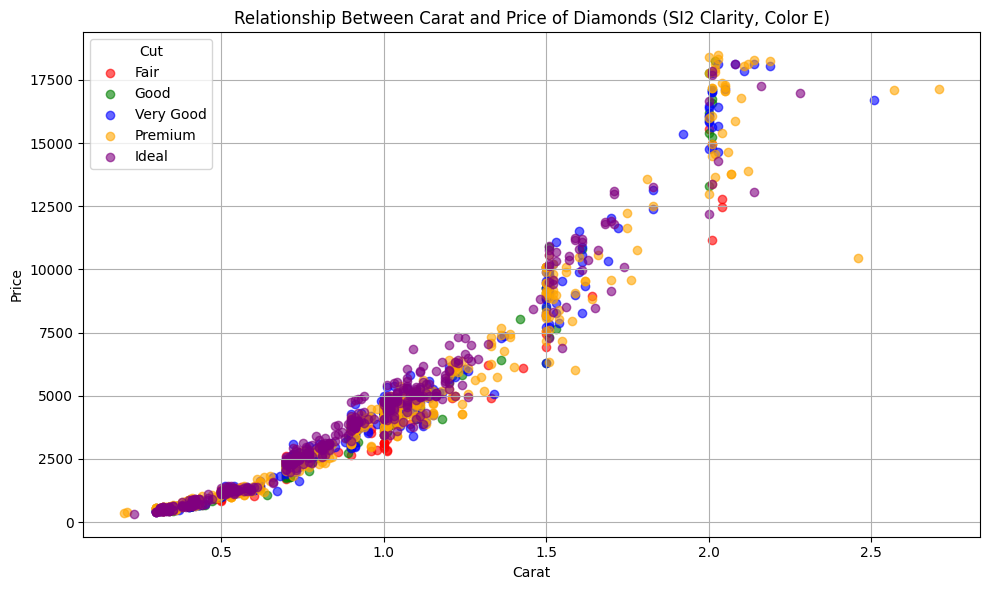

In [8]:
filtered_df = df[(df['clarity'] == 'SI2') & (df['color'] == 'E')]
print(filtered_df)

plt.figure(figsize=(10, 6))
colors = {'Fair': 'red', 'Good': 'green', 'Very Good': 'blue', 'Premium': 'orange', 'Ideal': 'purple'}
for cut, color in colors.items():
    subset_df = filtered_df[filtered_df['cut'] == cut]
    plt.scatter(subset_df['carat'], subset_df['price'], label=cut, color=color, alpha=0.6)

plt.title('Relationship Between Carat and Price of Diamonds (SI2 Clarity, Color E)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Cut')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# Question No 4
df=pd.read_csv('./nuclear_waste_sites.csv')
df.head()

,lat,lon,text
0,35.888827,-106.305022,Pueblo Canyon
1,39.503487,-84.743859,Alba Craft Shop
2,44.620822,-123.120917,Albany Oregon
3,40.641371,-80.242936,Aliquippa Forge
4,39.361063,-84.540750,AAT and Co.


In [10]:
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4, tiles='OpenStreetMap')

for index, row in df.iterrows():
    folium.Marker(location=[row['lat'], row['lon']], tooltip=row['text']).add_to(m)

m

In [11]:
# Question No 5
df=pd.read_csv('./pak-heritage-sites.csv',names=["Latitude", "Longitude", "Name"])
df


,Latitude,Longitude,Name
0,27.326079,68.135812,Mohenjo Daro
1,32.964845,73.574514,Rohtas Fort
2,31.588131,74.309500,Badshahi Mosque
3,31.743281,73.955412,Hiran Minar
4,30.199285,71.471705,Tomb of Shah Rukn-e-Alam
5,25.897372,67.901791,Ranikot Fort
6,36.325857,74.669851,Baltit Fort
7,28.879875,71.342872,Derawar Fort
8,32.648188,73.008418,Khewra Salt Mines


In [12]:
m = folium.Map(location=[30.3753, 69.3451], zoom_start=6)

for index, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], tooltip=row['Name']).add_to(m)

m